# Week 10: Instructor Led Lab
Author: Jen Estes \
Course: BGEN 632 - Introduction to Python \
Term: Spring 2025 \
Due Date: May 7th, 2025 

This notebook contains code for the inspection and organization of data based on the requirements outlined by Dr. Newton in the BGEN632 Week 10 GitHub repo. While using data from survey responses of 61 randomly selected hospitals in California, this program conducts a Principal Component Analysis (PCA) and a k-means cluster analysis to provide suggestions for the team working on assessing the condition of the healthcare system in California.

### Importing Modules
----

In [247]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

### Set Working Directory

In [250]:
# set working directory
os.chdir("/Users/jenestes/Desktop/week10labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'/Users/jenestes/Desktop/week10labs/data'

### Load Data

In [253]:
# Load Data 
# Hospital Data
hospital_data = pd.read_csv("calihospital.txt", delimiter = "\t")
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

### Creating New DataFrames

In [256]:
hospital_data.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


In [258]:
# selecting numeric columns
num_data = hospital_data.iloc[:, [7,8,9,10,11,12,13]]
num_data.info

<bound method DataFrame.info of      NoFTE     NetPatRev     InOperExp    OutOperExp     OperRev    OperInc  \
0    327.0  1.355202e+05  2.052343e+07  3.491622e+07    49933713   -5505933   
1    345.0  1.361567e+05  3.344754e+07  2.034860e+07    53351748    -444391   
2    601.2  1.970943e+05  3.725418e+07  3.783245e+07    72933707   -2152920   
3    400.0  1.391704e+05  2.338557e+07  2.466136e+07    51087341    3040415   
4    262.0  1.167978e+05  1.368450e+07  1.515999e+07    42845642   14001153   
..     ...           ...           ...           ...         ...        ...   
56  2814.0  1.321032e+06  3.791029e+08  1.064302e+08   491523782    5990693   
57  5218.0  1.187022e+06  2.912481e+08  1.093286e+08   439084836   38508125   
58  6392.0  4.333934e+06  9.289621e+08  6.621559e+08  1650391999   59273999   
59  1565.1  2.736281e+06  6.337903e+08  2.960207e+08  1074256998  144445998   
60  8000.0  4.662582e+06  1.285631e+09  4.616758e+08  1912179417  164872413   

    AvlBeds  
0    

In [260]:
# inspect summary statistics
num_data.describe()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000
mean,1350.264262,6.695836e+05,1.662706e+08,9.015808e+07,2.562733e+08,-1.553491e+05,194.524590
std,2025.285385,1.097513e+06,2.827876e+08,1.372897e+08,4.249851e+08,7.154457e+07,221.832941
min,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,215.500000,6.579243e+04,1.368450e+07,1.426128e+07,2.416452e+07,-1.108177e+06,42.000000
50%,374.320000,1.723989e+05,3.184268e+07,3.491622e+07,6.339822e+07,1.572695e+06,99.000000
75%,1216.000000,5.409751e+05,1.737450e+08,9.306671e+07,1.998738e+08,6.198330e+06,234.000000
max,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


### Principal Component Analysis (PCA)
This section of my program conducts a PCA for the 7 numerical variables related to the hospitals. First, I use the eigenvalues to determine which variables should be kept, and then I create a scree plot and see how the results compare. I first do this for the raw, untransformed data, but I end up scaling the data so the models are more accurate. 

In [263]:
# run the PCA - 7 components  
pca_result = pca(n_components=7).fit(num_data)
# obtain eigenvalues - focus on the output
pca_result.explained_variance_

array([2.75753261e+17, 6.75028311e+15, 2.04591348e+15, 2.44102791e+09,
       3.37008097e+05, 6.33647054e+03, 4.13822586e-05])

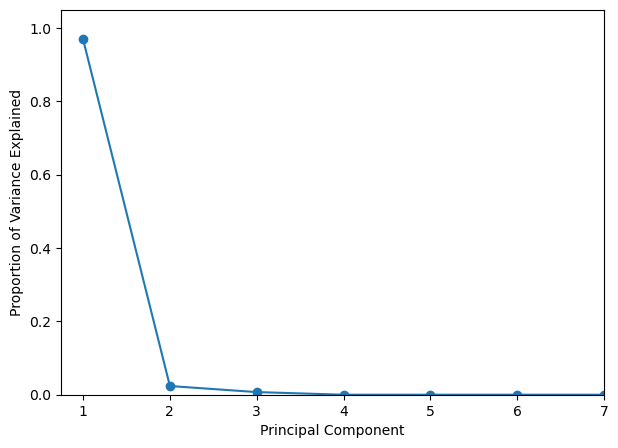

In [265]:
# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

The results of the scree plot and eigenvalues do not align, and this is likely due to the nature of the data and wide range of values. In order to address this, I scale the data and then perform the PCA. 
#### Scaling Data

In [268]:
# scale data using standardization
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(num_data)

# run PCA with scaled data
pca_result2 = pca(n_components=7).fit(scaled_data)

In [270]:
# obtain eigenvalues - focus on the output
pca_result2.explained_variance_

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91420738e-22])

The results from the eigenvalues suggest that from these 7 numerical variables, only 2 should be used for the analysis. We know this because there are only two components that are greater than 1. What this assessment tells us, is that in reality we are only dealing with 3 variables. Now, we turn to the scree plot to see if this assessment gives the same results. 

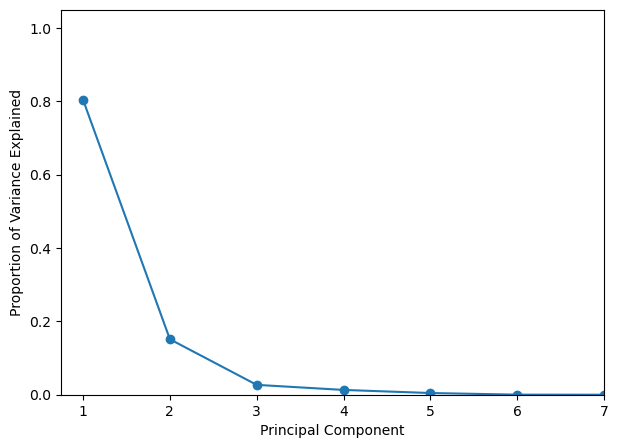

In [273]:
# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result2.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

The results from the scree plot above are consistent with those from the eigenvalues. We can see that the first 2 components are not flat. Starting with `Component 3` you can see the plot is level and flat. This suggests that out of 7 variables, only 2 should be used for the analysis. This means that some combination of all 7 variables should yield just 2.

### Clustering in Python- Setup
This section of my program uses the numerical variables related to hospitals and the following three categorical variables to  conduct a *k*-means cluster analysis:

* `TypeControl`
* `Teaching`
* `DonorType`

This helps us determine which categorical variable is the best grouping variable. 

In [277]:
# subset numerical variables and categorical variables
clust_data = (hospital_data
              .filter([
                  'NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','OperInc','AvlBeds',
                  'Teaching', 'TypeControl', 'DonorType'
              ]))
clust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NoFTE        61 non-null     float64
 1   NetPatRev    61 non-null     float64
 2   InOperExp    61 non-null     float64
 3   OutOperExp   61 non-null     float64
 4   OperRev      61 non-null     int64  
 5   OperInc      61 non-null     int64  
 6   AvlBeds      61 non-null     int64  
 7   Teaching     61 non-null     object 
 8   TypeControl  61 non-null     object 
 9   DonorType    61 non-null     object 
dtypes: float64(4), int64(3), object(3)
memory usage: 4.9+ KB


In [279]:
# inspect unique values for categorical variables
print(hospital_data['Teaching'].unique())
print(hospital_data['TypeControl'].unique())
print(hospital_data['DonorType'].unique())

['Small/Rural' 'Teaching']
['District' 'Non Profit' 'Investor' 'City/County']
['Charity' 'Alumni']


In [281]:
le = preprocessing.LabelEncoder()

### 2 Clusters for `Teaching`
This section of my program focuses on the `Teaching` variable. *Teaching* has two values, so will start the clustering analysis with $k=2$ or `n_clusters=2`.

In [319]:
km = cls.KMeans(n_clusters=2).fit(num_data)
km.labels_

clust_data['Teaching'] = le.fit_transform(clust_data['Teaching'])

cm1 = metcs.confusion_matrix(clust_data.Teaching, km.labels_)
print(cm1)

[[ 0 44]
 [ 9  8]]


### 4 Clusters for `TypeControl`
This section of my program focuses on the `TypeControl` variable. This variable has 4 values, so we will use 4 potential clusters, $k=4$ or `n_clusters=4`.

In [322]:
clust_data.TypeControl.unique()

km2 = cls.KMeans(n_clusters=4).fit(num_data)
km2.labels_

clust_data['TypeControl'] = le.fit_transform(clust_data['TypeControl'])

cm2 = metcs.confusion_matrix(clust_data.TypeControl, km2.labels_)
print(cm2)

[[ 3  0  2  2]
 [14  0  0  0]
 [ 3  0  0  0]
 [27  3  7  0]]


### 2 Clusters for `DonorType`
This section of my program focuses on the `DonorType` variable. This variable has 6 values, so we will use 6 potential clusters, $k=6$ or `n_clusters=6`.

In [325]:
clust_data.DonorType.unique()

km3 = cls.KMeans(n_clusters=2).fit(num_data)
km3.labels_

clust_data['DonorType'] = le.fit_transform(clust_data['DonorType'])

cm3 = metcs.confusion_matrix(clust_data.DonorType, km3.labels_)
print(cm3)

[[ 8  9]
 [44  0]]


### Evaluating Grouping Variable and Confusion Matrix
This section of my program compares the three different clustering methods based on the grouping variables of `Teaching`, `TypeControl`, and `DonorType`. 

In [328]:
# ouput of all 3 methods
print("Teaching\n", cm1)
print("TypeControl\n",cm2)
print("DonorType\n",cm3)

Teaching
 [[ 0 44]
 [ 9  8]]
TypeControl
 [[ 3  0  2  2]
 [14  0  0  0]
 [ 3  0  0  0]
 [27  3  7  0]]
DonorType
 [[ 8  9]
 [44  0]]


From the output above, it seems that the Teaching variable is the best grouping variable based on the cleanliness of the matricies. This also goes along with the results from the PCA that 2 variables should be used for analysis. Below, I ouput the colored chart for this Teaching confusion matrix. The yellow standout color represents the "44" being very different compared to other data values in this matrix. 

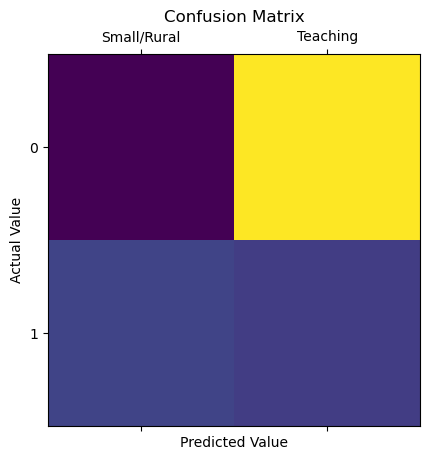

In [331]:
# color-based chart
plt.matshow(cm1)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.xticks([0,1], ['Small/Rural','Teaching'])

plt.show()

### Lab Complete!